<center><b><font color='navy', size=5>Pet Supplies Analytic Project</font></b></center>

In [140]:
import pandas as pd

In [141]:
pets = pd.read_csv("pet_supplies.csv")

In [142]:
pets

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1
...,...,...,...,...,...,...,...,...
1495,1496,Food,Bird,medium,40.91,1203.36,5.0,0
1496,1497,Equipment,Dog,small,32.89,1099.97,5.0,0
1497,1498,Food,Fish,Small,25.79,724.02,3.0,0
1498,1499,Medicine,Fish,small,19.94,658.66,5.0,1


In [143]:
pets.head(8)

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1
5,6,Housing,Dog,Small,30.77,874.58,7.0,0
6,7,Housing,Dog,Small,31.04,875.07,5.0,0
7,8,Toys,Cat,medium,28.9,1074.31,4.0,0


In [144]:
pets.tail(8)

,product_id,category,animal,size,price,sales,rating,repeat_purchase
1492,1493,Medicine,Cat,SMALL,24.95,993.08,7.0,1
1493,1494,Housing,Fish,small,21,535.90,3.0,1
1494,1495,Medicine,Bird,Small,39.96,1478.99,3.0,0
1495,1496,Food,Bird,medium,40.91,1203.36,5.0,0
1496,1497,Equipment,Dog,small,32.89,1099.97,5.0,0
1497,1498,Food,Fish,Small,25.79,724.02,3.0,0
1498,1499,Medicine,Fish,small,19.94,658.66,5.0,1
1499,1500,Food,Cat,Medium,25.95,826.08,4.0,1


In [145]:
pets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


From the summary info, all the columns are free of null values except the rating table which only has 1,350 non-null values out of 1500. 
In addition, price is an object instead of being a float or integer, that's kinda weird. In all, we have two ints, two floats and four objects

In [146]:
pets.describe(include=[object])

,category,animal,size,price
count,1500,1500,1500,1500
unique,7,4,9,707
top,Equipment,Cat,small,unlisted
freq,370,567,372,150


The result of the description of this pets dataframe is that, the Category column has seven unique values instead of six, Animal has four, 
size had nine instead of three as stated in the data description, while price has 707.

In [147]:
pets.describe()

,product_id,sales,rating,repeat_purchase
count,1500.000000,1500.000000,1350.000000,1500.000000
mean,750.500000,996.597847,4.991111,0.604000
std,433.157015,323.952676,1.559755,0.489228
min,1.000000,286.940000,1.000000,0.000000
25%,375.750000,747.420000,4.000000,0.000000
50%,750.500000,1000.830000,5.000000,1.000000
75%,1125.250000,1158.157500,6.000000,1.000000
max,1500.000000,2255.960000,9.000000,1.000000


In [148]:
# help(pd.DataFrame.describe)

### Product_id

In [149]:
pets["product_id"].isnull().sum()

0

In [150]:
pets.describe(include=[object])

,category,animal,size,price
count,1500,1500,1500,1500
unique,7,4,9,707
top,Equipment,Cat,small,unlisted
freq,370,567,372,150


In [151]:
pets['category'].nunique()

7

In [152]:
pets['category'].value_counts(dropna=False)

category
Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
-             25
Name: count, dtype: int64

In [153]:
pets['category'].replace({'-': 'Unknown'}, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_15620\1297208153.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pets['category'].replace({'-': 'Unknown'}, inplace=True)


In [154]:
round(pets['category'].value_counts(normalize=True, dropna=False)*100,2)

category
Equipment    24.67
Food         17.33
Toys         17.00
Medicine     15.80
Housing      15.13
Accessory     8.40
Unknown       1.67
Name: proportion, dtype: float64

From the above value_count, we can see that Equipment has the highest value of 24.67%, followed by Food at 17.33% with a close range with Toys at 17% as well as others.

In [155]:
pets.describe(include="all")

,product_id,category,animal,size,price,sales,rating,repeat_purchase
count,1500.000000,1500,1500,1500,1500,1500.000000,1350.000000,1500.000000
unique,NaN,7,4,9,707,NaN,NaN,NaN
top,NaN,Equipment,Cat,small,unlisted,NaN,NaN,NaN
freq,NaN,370,567,372,150,NaN,NaN,NaN
mean,750.500000,NaN,NaN,NaN,NaN,996.597847,4.991111,0.604000
std,433.157015,NaN,NaN,NaN,NaN,323.952676,1.559755,0.489228
min,1.000000,NaN,NaN,NaN,NaN,286.940000,1.000000,0.000000
25%,375.750000,NaN,NaN,NaN,NaN,747.420000,4.000000,0.000000
50%,750.500000,NaN,NaN,NaN,NaN,1000.830000,5.000000,1.000000
75%,1125.250000,NaN,NaN,NaN,NaN,1158.157500,6.000000,1.000000


In [156]:
round(pets['animal'].value_counts(normalize=True)*100,2)

animal
Cat     37.80
Fish    24.60
Dog     24.47
Bird    13.13
Name: proportion, dtype: float64

Cats are more in demand at 37.80% which is the highest, followed by Fish and Dog; with both almost at the same level of demand.

In [157]:
pets['size'].value_counts(dropna=False)

size
small     372
medium    233
Small     225
SMALL     157
Medium    150
large     122
MEDIUM    109
Large      75
LARGE      57
Name: count, dtype: int64

We have several inconsistencies in the names of the different sizes, such as SMALL, large, LARGE, medium, small, and MEDIUM. We need to correct it. Let's do the correction here:

In [158]:
pets['size'].replace({'LARGE':'Large', 'large':'Large','MEDIUM':'Medium','medium':'Medium','SMALL':'Small','small':'Small'}, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_15620\2593974041.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pets['size'].replace({'LARGE':'Large', 'large':'Large','MEDIUM':'Medium','medium':'Medium','SMALL':'Small','small':'Small'}, inplace=True)


In [159]:
round(pets['size'].value_counts(normalize=True, dropna=False)*100,2)

size
Small     50.27
Medium    32.80
Large     16.93
Name: proportion, dtype: float64

From the result above, we can deduce that Small size pets are the most ordered sets of pets taking over 50% of all orders, followed by Medium sized pets at 32.8%, and Large at 16.93%

In [160]:
pets['price']

0        51.1
1       35.98
2       31.23
3       24.95
4       26.18
        ...  
1495    40.91
1496    32.89
1497    25.79
1498    19.94
1499    25.95
Name: price, Length: 1500, dtype: object

In [161]:
pets.to_csv("pets_updated2.csv")

In [162]:
pets_cont3 = pd.read_csv("pets_updated2.csv")

In [163]:
pets_cont3.head(9)

,Unnamed: 0,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,0,1,Food,Bird,Large,51.1,1860.62,7.0,1
1,1,2,Housing,Bird,Medium,35.98,963.60,6.0,0
2,2,3,Food,Dog,Medium,31.23,898.30,5.0,1
3,3,4,Medicine,Cat,Small,24.95,982.15,6.0,1
4,4,5,Housing,Cat,Small,26.18,832.63,7.0,1
5,5,6,Housing,Dog,Small,30.77,874.58,7.0,0
6,6,7,Housing,Dog,Small,31.04,875.07,5.0,0
7,7,8,Toys,Cat,Medium,28.9,1074.31,4.0,0
8,8,9,Equipment,Fish,Medium,17.82,503.67,5.0,0


In [164]:
pets_cont3.drop(columns=["Unnamed: 0"], inplace = True)

In [165]:
pets_cont3['price']

0        51.1
1       35.98
2       31.23
3       24.95
4       26.18
        ...  
1495    40.91
1496    32.89
1497    25.79
1498    19.94
1499    25.95
Name: price, Length: 1500, dtype: object

In [166]:
pets_cont3['price'].dtype

dtype('O')

In [167]:
pets_cont3['price'].astype(float)

ValueError: could not convert string to float: 'unlisted'

In [ ]:
(pets_cont3['price']=="unlisted").sum()


In [ ]:
pets_cont3.info()

In [ ]:
pets_cont3['price'] = pd.to_numeric(pets_cont2['price'])

In [ ]:
pets_cont3['price'].loc[20]

In [ ]:
pets_cont3.iloc[20]

In [ ]:
pets_cont3['price'].replace('unlisted',0, inplace=True)

In [ ]:
# (pets_cont2['price']=='unlisted').sum()

In [ ]:
pets_cont3['price'] = pd.to_numeric(pets_cont3['price'])

In [ ]:
pets_cont3['price'].dtype

In [ ]:
pets_cont3.head(8)

## Sales

In [ ]:
pets_cont3['price']

In [ ]:
print(f"The sales range is Minimum price: ${pets_cont2['price'].min()}, while the Maximum price: ${pets_cont2['price'].max()}")

## Rating

In [ ]:
pets_cont3['rating'].isnull().sum()

In [ ]:
pets_cont3['rating'].fillna(0, inplace=True)

In [ ]:
pets_cont3['rating'].isnull().sum()

In [ ]:
pets_cont3['rating'].mean()

The average rating for the business is approximately 5. This cannot be guaranteed as the rating because the null values were changed to zero values, and around 150 null values were present out of 1500 rating values

In [ ]:
pets_cont3['repeat_purchase'].isnull().sum()

In [ ]:
pets_cont3['repeat_purchase'].value_counts(normalize=True)*100

From the result above, we can see that over 60% of the purchase are repeat_purchase; meaning majority of the customers always comes back to purchase an one animal or the other.
While over 39% only buy once. These are denoted by 1s and 0s.

# Exploratory Data Analysis

In [168]:
pets_cont3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

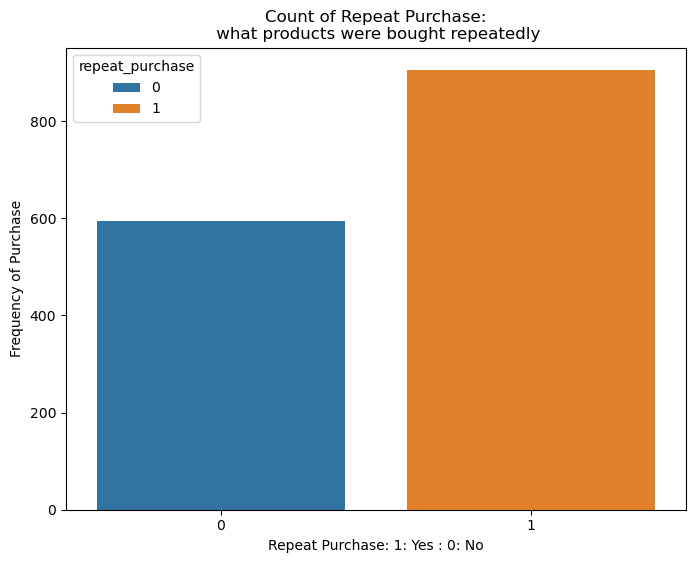

In [188]:
plt.figure(figsize=(8,6))
sns.countplot(data=pets_cont3, x="repeat_purchase", hue="repeat_purchase").set_title("Count of Repeat Purchase:\n what products were bought repeatedly")
plt.ylabel("Frequency of Purchase")
plt.xlabel("Repeat Purchase: 1: Yes : 0: No")
plt.show();

The majority of the purchases are repeat_purchases; meaning that majority of the customers bought more than once.

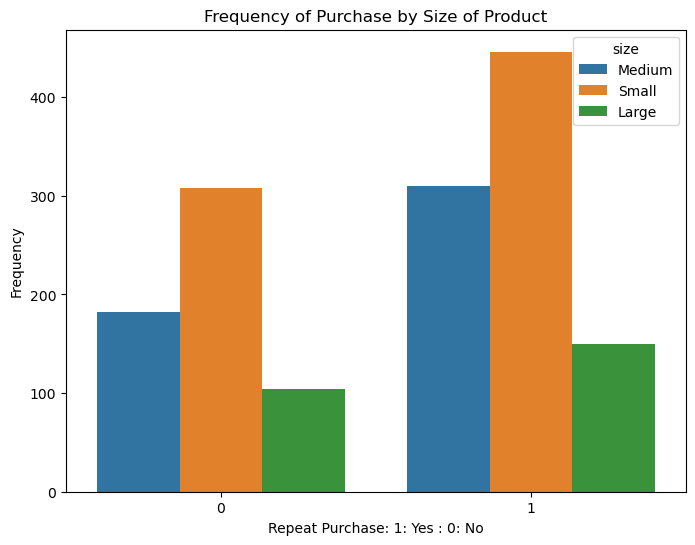

In [205]:
plt.figure(figsize=(8,6))
sns.countplot(data=pets_cont3, x="repeat_purchase", hue="size").set_title("Frequency of Purchase by Size of Product")
plt.ylabel("Frequency")
plt.xlabel("Repeat Purchase: 1: Yes : 0: No")
plt.show()

It can be deduced from the chart that small sized animals topped the repeat purchased chart; meaning they are more in demand than any other, this is followed by medium sized animals and then large sized animals.

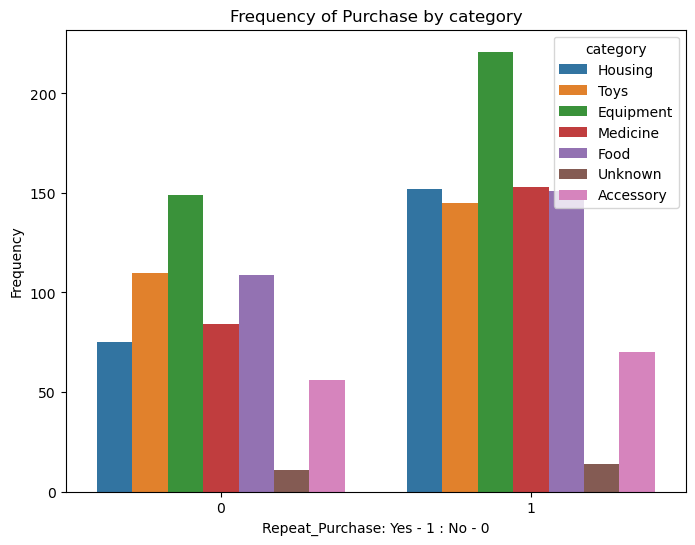

In [203]:
plt.figure(figsize=(8,6))
sns.countplot(data=pets_cont3, x="repeat_purchase", hue="category").set_title("Frequency of Purchase by category")
plt.ylabel("Frequency")
plt.xlabel("Repeat_Purchase: Yes - 1 : No - 0")
plt.show()

We can see that Equipment amde the highest repeated purchase among the products

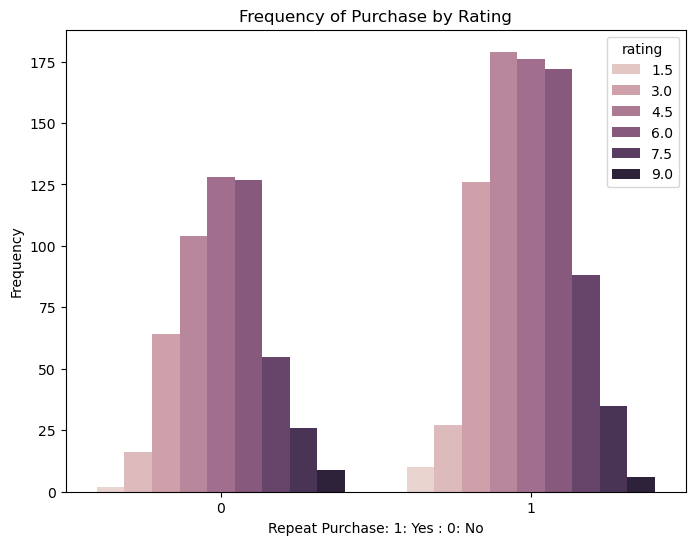

In [206]:
plt.figure(figsize=(8,6))
sns.countplot(data=pets_cont3, x="repeat_purchase", hue="rating").set_title("Frequency of Purchase by Rating")
plt.ylabel("Frequency")
plt.xlabel("Repeat Purchase: 1: Yes : 0: No")
plt.show()

Items with ratings of 4.5 made the highest repeated purchase according to the above charts. This is also in correlation with the mean of the rating which is 4.5. Thus, we can see that the items with rating of 4.5 has the highest number of repeated purchase.

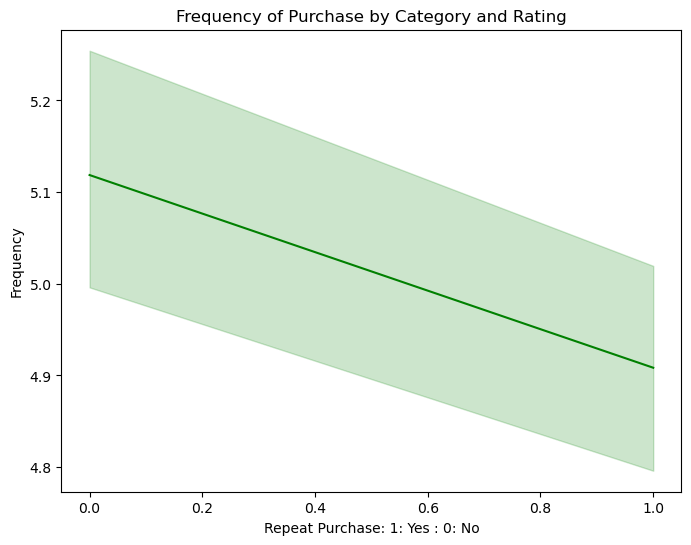

In [212]:
# plt.figure(figsize=(8,6))
# sns.lineplot(data=pets_cont3, x="repeat_purchase", y="rating", color="green").set_title("Frequency of Purchase by Category and Rating")
# plt.ylabel("Frequency")
# plt.xlabel("Repeat Purchase: 1: Yes : 0: No")
# plt.show()

<Axes: >

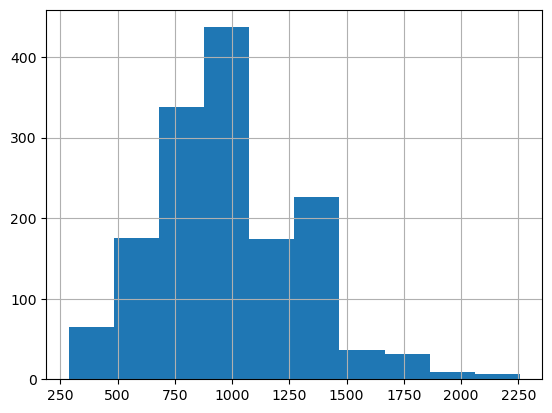

In [213]:
pets_cont3['sales'].hist()